DAT405 Assignment 2
Noah Lanai - 9808252192 - 14h work
Theodor Jendle - 9901134339 - 14h work
Carl Hjalmarsson - 9305198930 - 14h work

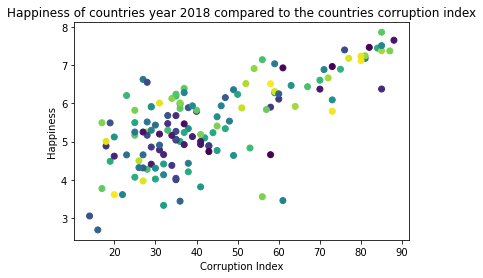

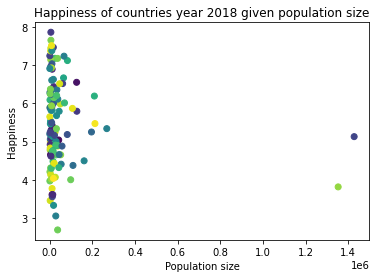

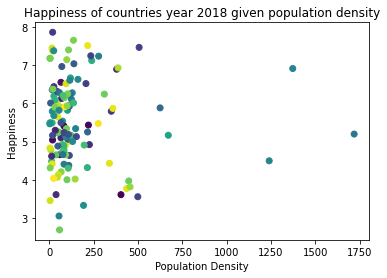

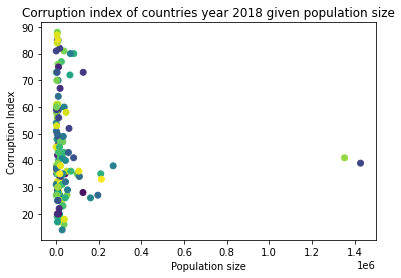

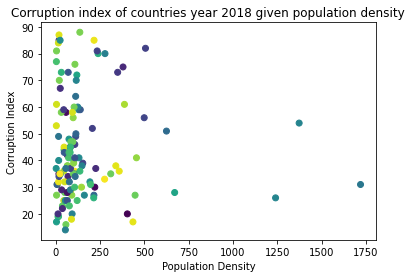

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics as st
import os

dataFolder = "data-prob-2"
corruptionFile = os.path.join(dataFolder, "corruption.csv")
happinessFile = os.path.join(dataFolder, "happiness.csv")
popFile = os.path.join("data-prob-1", "WPP2019_TotalPopulationBySex.csv")

corruption = pd.read_csv(corruptionFile, index_col = False)
happiness = pd.read_csv(happinessFile, index_col = False)
population = pd.read_csv(popFile, index_col = False)

corruptionYear2018 = corruption[corruption["Year"] == 2018]
happinessYear2018 = happiness[happiness["Year"] == 2018]
populationYear2018 = population[population["Time"] == 2018]
corruptionYear2018.reset_index(drop=True, inplace=True)
happinessYear2018.reset_index(drop=True, inplace=True)
populationYear2018.reset_index(drop=True, inplace=True)

def RelateData(corruptionData, happinessData):
    corruption = []
    happiness = []
    countryData = []

    EntityDataCorruption = corruptionData.Entity
    EntityDataHappiness = happinessData.Entity
    for i in range(len(corruptionData)):
        for j in range(len(happinessData)):
            if EntityDataHappiness[j] == EntityDataCorruption[i]:
                corruption.append(corruptionData.Corruption[i])
                happiness.append(happinessData.Happiness[j])
                countryData.append(EntityDataCorruption[i])
    return(corruption, happiness, countryData)


data = RelateData(corruptionYear2018, happinessYear2018)
corr = data[0]
happ = data[1]
country = data[2]

def RelateToPopulation(populationData, countryData, corruptionData, happinessData):
    population = []
    populationDensity = []
    country = []
    corruption = []
    happiness = []

    Entities = countryData
    EntityPopulation = populationData.Location
    for i in range(len(countryData)):
        for j in range(len(populationData)):
            if Entities[i] == EntityPopulation[j]:
                population.append(populationData.PopTotal[j])
                populationDensity.append(populationData.PopDensity[j])
                country.append(Entities[i])
                corruption.append(corruptionData[i])
                happiness.append(happinessData[i])
    return(population, populationDensity, country, corruption, happiness)

populationData = RelateToPopulation(populationYear2018, country, corr, happ)
populationByCountry = populationData[0]
populationDensityByCountry = populationData[1]
populationWhichCountry = populationData[2]
corruptionWithPopulation = populationData[3]
happinessWithPopulation = populationData[4]

populationByCountry.pop(104)
populationDensityByCountry.pop(104)
populationWhichCountry.pop(104)
corruptionWithPopulation.pop(104)
happinessWithPopulation.pop(104)

N = len(corr)
M = len(populationByCountry)
colors = np.random.rand(N)
colors2 = np.random.rand(M)
plt.scatter(corr, happ, c=colors)
plt.xlabel("Corruption Index")
plt.ylabel("Happiness")
plt.title("Happiness of countries year 2018 compared to the countries corruption index")
plt.show()

plt.scatter(populationByCountry, happinessWithPopulation, c=colors2)
plt.xlabel("Population size")
plt.ylabel("Happiness")
plt.title("Happiness of countries year 2018 given population size")
plt.show()


plt.scatter(populationDensityByCountry, happinessWithPopulation, c=colors2)
plt.xlabel("Population Density")
plt.ylabel("Happiness")
plt.title("Happiness of countries year 2018 given population density")
plt.show()


plt.scatter(populationByCountry, corruptionWithPopulation, c=colors2)
plt.xlabel("Population size")
plt.ylabel("Corruption Index")
plt.title("Corruption index of countries year 2018 given population size")
plt.show()


plt.scatter(populationDensityByCountry, corruptionWithPopulation, c=colors2)
plt.xlabel("Population Density")
plt.ylabel("Corruption Index")
plt.title("Corruption index of countries year 2018 given population density")
plt.show()



a) State several meaningful questions:
1. Does corruption affect happiness within a country
2. Does population affect happiness?
3. Does a high population density affect happiness?
4. Does population affect corruption?
5. Does a high population density affect corruption?

Answeres:
1. We can clearly see that corruption and happiness within a country has a linear correlation with one another, where high corruption index implies high happiness.

2. We notice that when a country is highly populated the people are generally dissatisfied with their life, however a small population size does not necessarily imply happiness, for smaller populations the happiness is flucuant.

3. (Because of Singapores absurbly high population density, approximately 5 times bigger than the second highest, it was not considered since it resulted in a bad visual presentation of this question and also question 5) There is no general relation between happiness and population density.

4. From this graph we can see that a high population size results in corruption (note that 0 is the index which denotes maximum corruption), since every highly populated country has a low corruption index. However like stated in question 2, a small population size does not imply high corruption index.

5. High population density results in much corruption within a country. Furthermore we notice that countries with high corruption index are countries which have a low population density.

We chose only to observe the year 2018 because it is a better visualization to visualize the current state of the world, furthermore if we were to present it with a timeline aswell another dimension in the graph would be needed, which might cause confussion.

b) We realized that these data generally didnt have a very strong correlation with one another, except the relation between happiness and corruption. Because of this we could not extract generall information unfortunatly. However there was one common observation when comparing this data which was that in term of happiness and corruption, a highly populated country or a country with high population density is not preferred. 